In [2]:
import pandas as pd
import numpy as np

# Example DataFrame
df = pd.read_csv('../data/future/agg/MESM24.csv')

# Volatility Analysis: Calculate True Range and Average True Range (ATR)
df['TR'] = np.maximum(df['High'] - df['Low'], np.maximum(abs(df['High'] - df['Close'].shift(1)), abs(df['Low'] - df['Close'].shift(1))))
df['ATR'] = df['TR'].rolling(window=5).mean()  # You can adjust the window size

# Volume Analysis: Moving Average of Volume
df['Volume_MA'] = df['Volume'].rolling(window=5).mean()

# Candlestick Patterns: Example for a large move (simple version)
df['Large Move'] = (df['Close'] > df['Open'] * 1.001) | (df['Close'] < df['Open'] * 0.999)

# Support and Resistance Levels
df['Resistance'] = df['High'].rolling(window=5).max()
df['Support'] = df['Low'].rolling(window=5).min()

# Risk/Reward Ratio (simplified, based on previous bar moves)
df['Risk'] = df['Close'] - df['Low']
df['Reward'] = df['High'] - df['Close']
df['Risk/Reward'] = df['Reward'] / df['Risk']

# Output the DataFrame with the new columns
print(df[['ATR', 'Volume_MA', 'Large Move', 'Support', 'Resistance', 'Risk/Reward']])


      ATR  Volume_MA  Large Move  Support  Resistance  Risk/Reward
0     NaN        NaN       False      NaN         NaN     0.629630
1     NaN        NaN       False      NaN         NaN     0.875000
2     NaN        NaN        True      NaN         NaN     0.108696
3     NaN        NaN       False      NaN         NaN          inf
4     NaN    18270.2       False  5039.25     5057.50     0.142857
..    ...        ...         ...      ...         ...          ...
481  4.70     7824.2       False  5132.00     5143.75    12.000000
482  5.00    10487.8       False  5128.75     5140.50     7.666667
483  5.10    10806.8       False  5128.75     5139.25     0.444444
484  4.00     9001.6       False  5128.75     5138.00     6.000000
485  3.05     7377.4       False  5128.75     5137.00     1.000000

[486 rows x 6 columns]


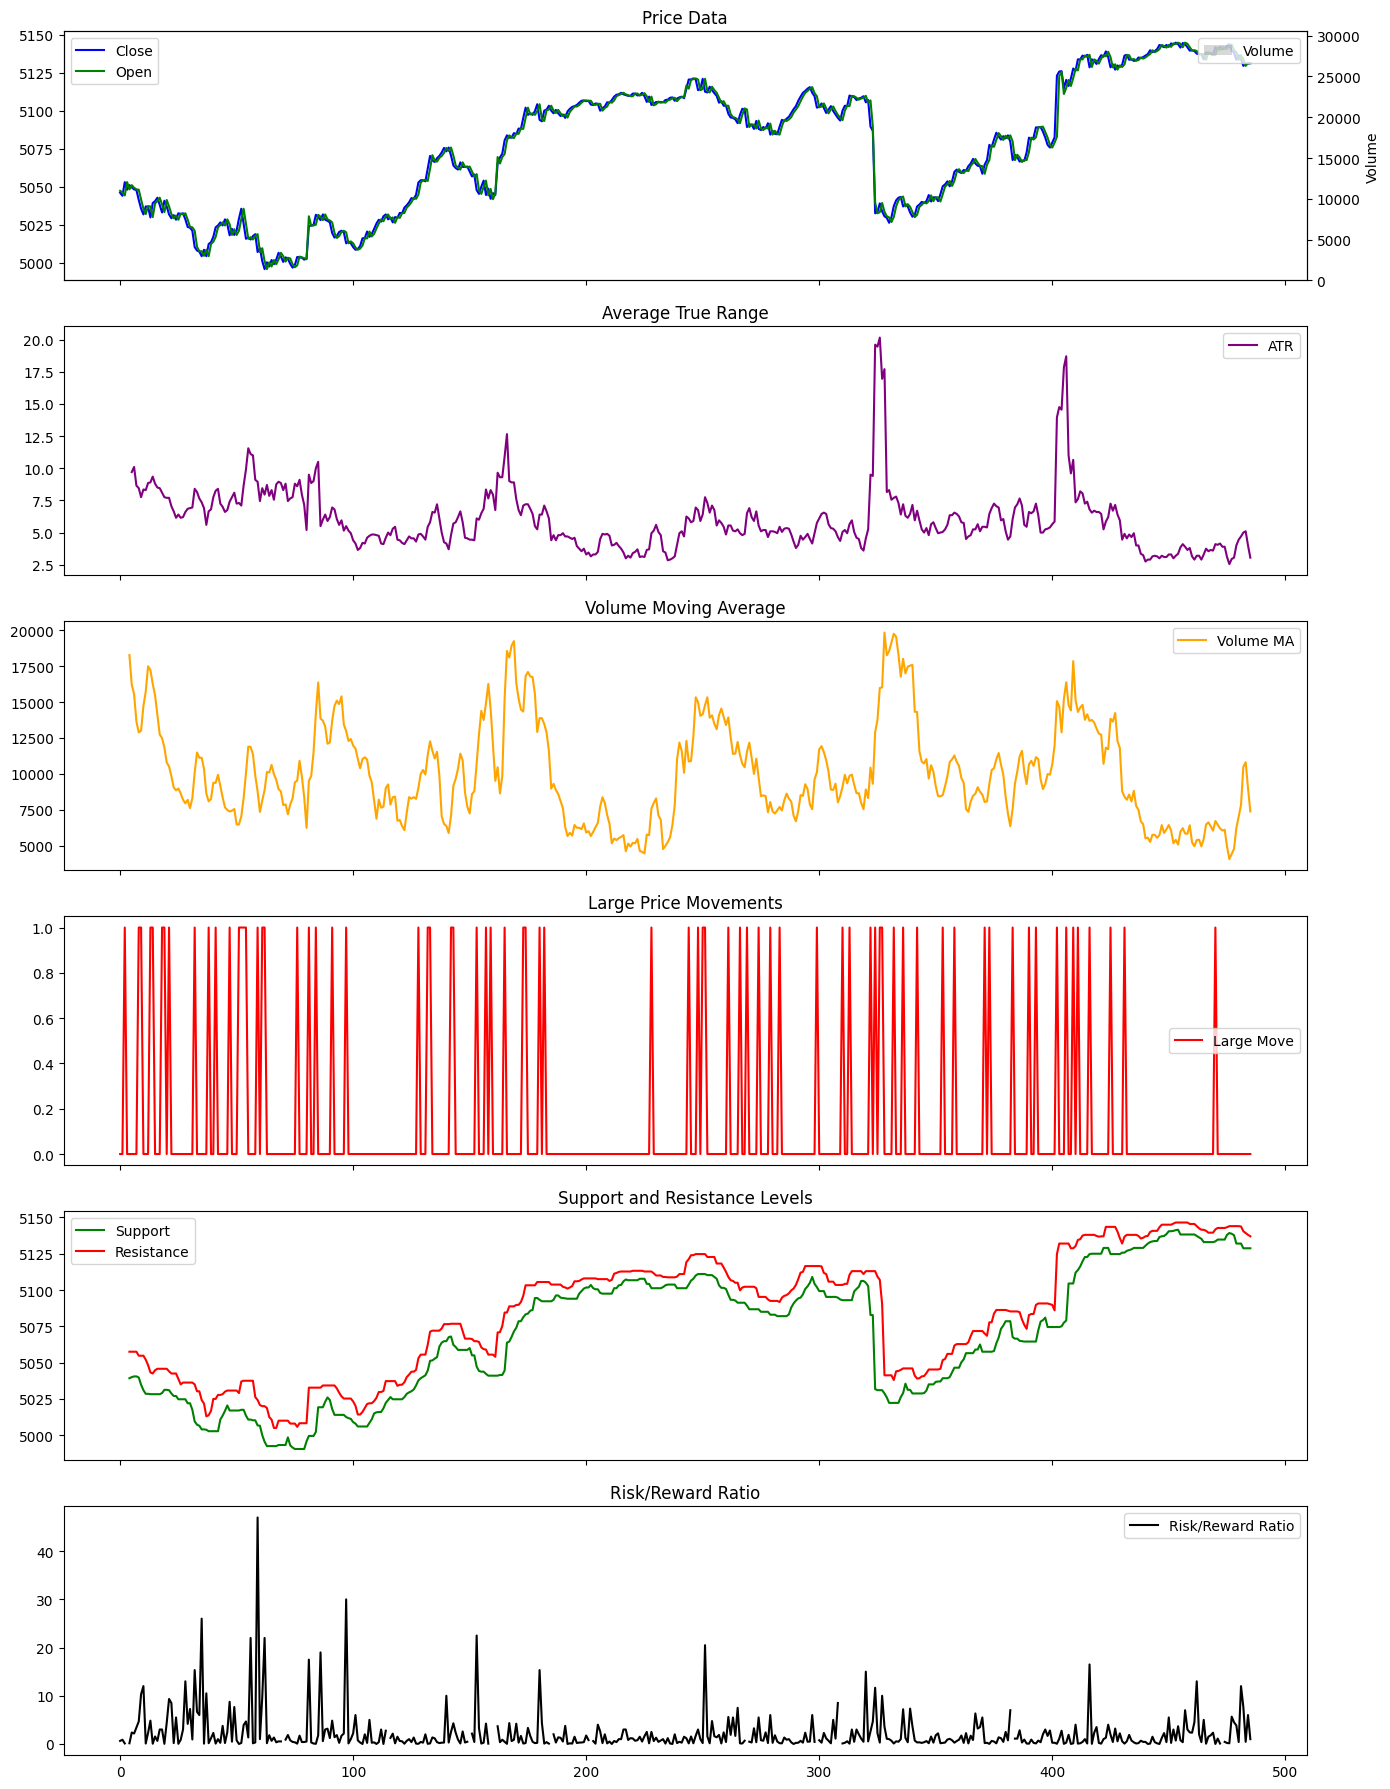

In [4]:
import matplotlib.pyplot as plt

# Plotting setup
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(14, 18), sharex=True)

# Price and Volume plot
axes[0].plot(df.index, df['Close'], label='Close', color='blue')
axes[0].plot(df.index, df['Open'], label='Open', color='green')
axes[0].set_title('Price Data')
axes[0].legend(loc='upper left')

# Add a secondary axis for volume on the same plot as price
ax2 = axes[0].twinx()
ax2.bar(df.index, df['Volume'], label='Volume', color='gray', width=0.0005, alpha=0.3)
ax2.set_ylabel('Volume')
ax2.legend(loc='upper right')

# ATR plot
axes[1].plot(df.index, df['ATR'], label='ATR', color='purple')
axes[1].set_title('Average True Range')
axes[1].legend()

# Volume Moving Average plot
axes[2].plot(df.index, df['Volume_MA'], label='Volume MA', color='orange')
axes[2].set_title('Volume Moving Average')
axes[2].legend()

# Large Moves
axes[3].plot(df.index, df['Large Move'], label='Large Move', color='red')
axes[3].set_title('Large Price Movements')
axes[3].legend()

# Support and Resistance Levels
axes[4].plot(df.index, df['Support'], label='Support', color='green')
axes[4].plot(df.index, df['Resistance'], label='Resistance', color='red')
axes[4].set_title('Support and Resistance Levels')
axes[4].legend()

# Risk/Reward Ratio
axes[5].plot(df.index, df['Risk/Reward'], label='Risk/Reward Ratio', color='black')
axes[5].set_title('Risk/Reward Ratio')
axes[5].legend()

# Adjust layout
plt.tight_layout()
plt.show()
